In [1]:
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install statsmodels


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [659]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import datetime


In [719]:
house_price_df = pd.read_csv("train.csv", low_memory=False,  header = 0)

In [720]:
house_price_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [721]:
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [722]:
house_price_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Data cleaning and manipulation

In [723]:
#Adding missing values with meaning for categorial variables
house_price_df.Alley.fillna('NA', inplace=True)
house_price_df.BsmtQual.fillna('NA', inplace=True)
house_price_df.MasVnrType.fillna('None', inplace=True)
house_price_df.BsmtExposure.fillna('NA', inplace=True)
house_price_df.BsmtCond.fillna('NA', inplace=True)
house_price_df.BsmtFinType1.fillna('NA', inplace=True)
house_price_df.BsmtFinType2.fillna('NA', inplace=True)
house_price_df.Electrical.fillna('SBrkr', inplace=True)
house_price_df.FireplaceQu.fillna('NA', inplace=True)
house_price_df.GarageType.fillna('NA', inplace=True)
house_price_df.GarageYrBlt.fillna(0.0, inplace=True)
house_price_df.GarageFinish.fillna('NA', inplace=True)
house_price_df.GarageQual.fillna('NA', inplace=True)
house_price_df.GarageCond.fillna('NA', inplace=True)
house_price_df.Fence.fillna('NA', inplace=True)
house_price_df.MiscFeature.fillna('NA', inplace=True)
house_price_df.PoolQC.fillna('NA', inplace=True)

#Adding missing values for categorical variables
house_price_df.LotFrontage.fillna(house_price_df.LotFrontage.median(), inplace=True)
house_price_df.MasVnrArea.fillna(house_price_df.MasVnrArea.median(), inplace=True)

In [724]:
# Removing categorical column as more than 80% data is one category
categorial_columns_to_be_removed= ['Alley','Street','LandContour','Utilities','LandSlope','Condition1','Condition2','BldgType','RoofMatl','ExterCond','BsmtCond','BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition','PoolQC','MiscFeature','Fence']
house_price_df.drop(categorial_columns_to_be_removed, axis=1,inplace = True)

#droping column as greater than 80% houses dont have exterior 2nd
house_price_df.drop(['Exterior2nd'], axis=1,inplace = True)

house_price_df.drop(['Id'], axis=1,inplace = True)

In [725]:
#Renaming value for consistency
house_price_df.MSZoning[house_price_df.MSZoning == 'C (all)'] = 'C'

/var/folders/lx/dw27zfb556q4s5yfn2blyplm0000gn/T/ipykernel_10216/1885228505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_price_df.MSZoning[house_price_df.MSZoning == 'C (all)'] = 'C'


In [726]:
#Merging categories
house_price_df.LotConfig[house_price_df.LotConfig == 'FR2'] = 'FR'
house_price_df.LotConfig[house_price_df.LotConfig == 'FR3'] = 'FR'

house_price_df.RoofStyle[house_price_df.RoofStyle == 'Mansard'] = 'OTHERS'
house_price_df.RoofStyle[house_price_df.RoofStyle == 'Shed'] = 'OTHERS'

house_price_df.Foundation[house_price_df.Foundation == 'Slab'] = 'OTHERS'
house_price_df.Foundation[house_price_df.Foundation == 'Stone'] = 'OTHERS'
house_price_df.Foundation[house_price_df.Foundation == 'Wood'] = 'OTHERS'

/var/folders/lx/dw27zfb556q4s5yfn2blyplm0000gn/T/ipykernel_10216/2917996313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_price_df.LotConfig[house_price_df.LotConfig == 'FR2'] = 'FR'
/var/folders/lx/dw27zfb556q4s5yfn2blyplm0000gn/T/ipykernel_10216/2917996313.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_price_df.LotConfig[house_price_df.LotConfig == 'FR3'] = 'FR'
/var/folders/lx/dw27zfb556q4s5yfn2blyplm0000gn/T/ipykernel_10216/2917996313.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

In [727]:
#Derived columns
house_price_df.Age = house_price_df.YrSold - house_price_df.YearBuilt
today = datetime.date.today()
year = today.year
house_price_df.GarageAge = year - house_price_df.GarageYrBlt
house_price_df.GarageAge[house_price_df.GarageAge == 2023.0] = 0.0

/var/folders/lx/dw27zfb556q4s5yfn2blyplm0000gn/T/ipykernel_10216/3838202535.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  house_price_df.Age = house_price_df.YrSold - house_price_df.YearBuilt
/var/folders/lx/dw27zfb556q4s5yfn2blyplm0000gn/T/ipykernel_10216/3838202535.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  house_price_df.GarageAge = year - house_price_df.GarageYrBlt


In [728]:
house_price_df.drop(['YearRemodAdd','YearBuilt','GarageYrBlt','YrSold','MoSold'], axis=1,inplace = True)

#### Value replacement

In [729]:
# Replacing numerical values with meaningfull names so that dummy variables can be more readable
house_price_df.OverallQual = house_price_df.OverallQual.map({1:'poor', 2:'v_poor', 3:'fair', 4:'b_average', 5:'average', 6: 'a_average', 7: 'good', 8: 'v_good', 10: 'excellent', 7: 'v_excellent'})
house_price_df.OverallCond = house_price_df.OverallCond.map({1:'poor', 2:'v_poor', 3:'fair', 4:'b_average', 5:'average', 6: 'a_average', 7: 'good', 8: 'v_good', 10: 'excellent', 7: 'v_excellent'})

In [730]:
house_price_df.describe()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,42.300571,22.027677,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,20.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,20.000000,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,50.000000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,70.000000,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,190.000000,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [731]:
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1417 non-null   object 
 9   OverallCond    1438 non-null   object 
 10  RoofStyle      1460 non-null   object 
 11  Exterior1st    1460 non-null   object 
 12  MasVnrType     1460 non-null   object 
 13  MasVnrArea     1460 non-null   float64
 14  ExterQual      1460 non-null   object 
 15  Foundation     1460 non-null   object 
 16  BsmtQual       1460 non-null   object 
 17  BsmtExposure   1460 non-null   object 
 18  BsmtFinT

In [732]:
house_price_df.GarageArea.value_counts()

0       81
440     49
576     47
240     38
484     34
528     33
288     27
400     25
264     24
480     24
308     20
420     19
280     16
672     15
216     12
504     12
352     12
336     12
564     11
360     11
540     10
300     10
462     10
572     10
312      9
180      9
384      9
660      9
539      9
286      9
550      8
432      8
520      8
588      8
624      7
506      7
474      7
460      7
648      7
390      6
380      6
472      6
500      6
546      6
525      6
396      6
478      6
461      6
490      6
840      6
492      6
252      5
529      5
297      5
451      5
720      5
431      5
560      5
434      5
338      5
676      5
270      5
450      5
527      5
299      5
530      5
544      5
532      4
470      4
200      4
577      4
430      4
442      4
402      4
502      4
552      4
463      4
516      4
294      4
834      4
600      4
495      4
438      3
364      3
615      3
457      3
429      3
884      3
666      3
392      3
275      3

In [733]:
house_price_df['MSZoning'] = house_price_df['MSZoning'].astype('object')
house_price_df['MSSubClass'] = house_price_df['MSSubClass'].astype('object')

#### Categorical Variables

<AxesSubplot: >

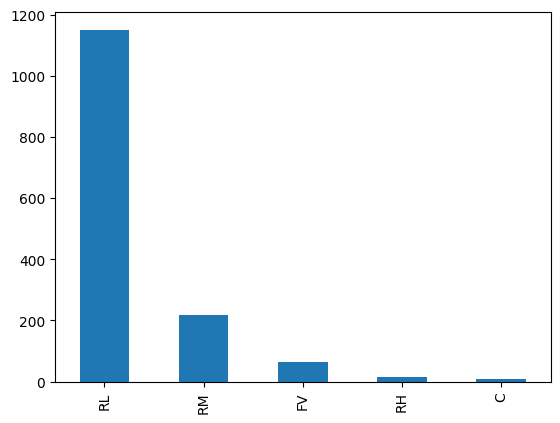

In [734]:
house_price_df.MSZoning.value_counts().plot.bar()

<AxesSubplot: >

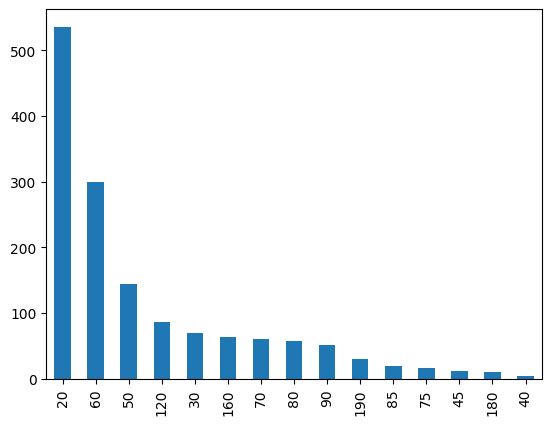

In [735]:
house_price_df.MSSubClass.value_counts().plot.bar()

<AxesSubplot: >

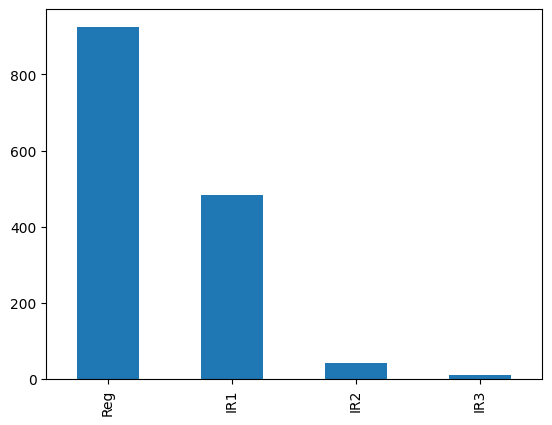

In [736]:
house_price_df.LotShape.value_counts().plot.bar()

<AxesSubplot: >

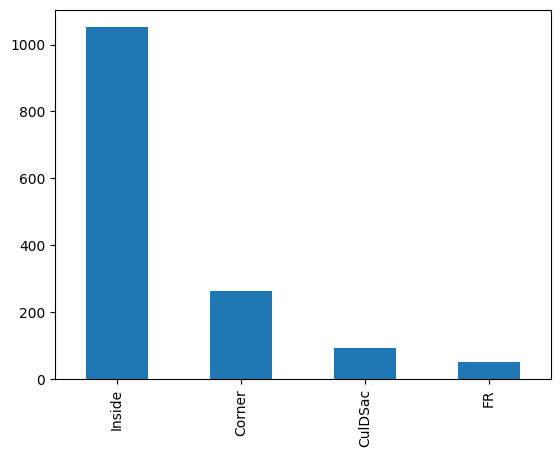

In [737]:
house_price_df.LotConfig.value_counts().plot.bar()

<AxesSubplot: >

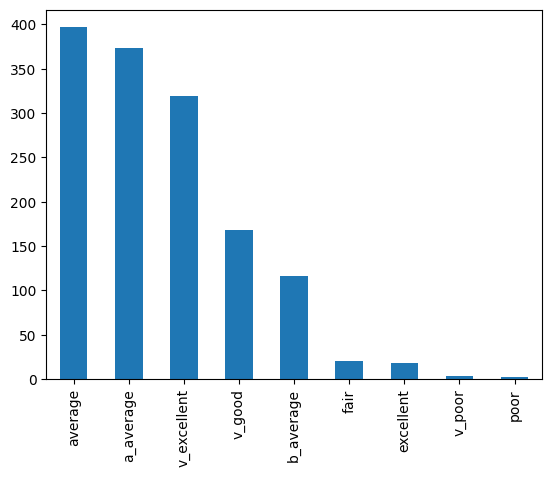

In [738]:
house_price_df.OverallQual.value_counts().plot.bar()

<AxesSubplot: >

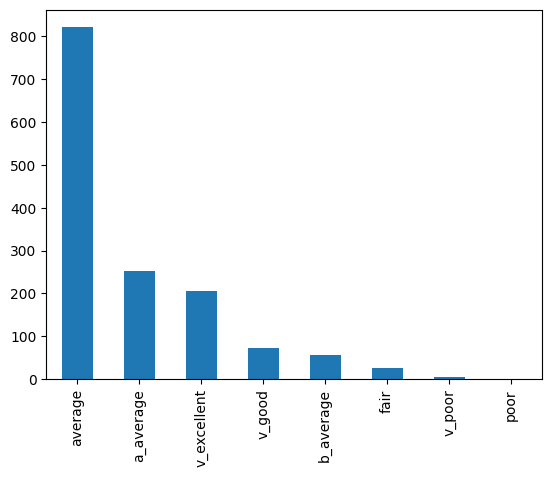

In [739]:
house_price_df.OverallCond.value_counts().plot.bar()

<AxesSubplot: >

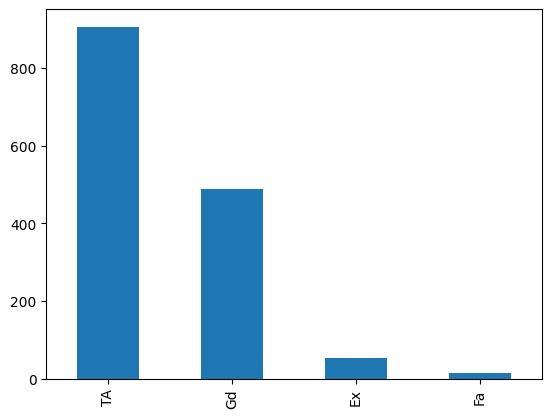

In [740]:
house_price_df.ExterQual.value_counts().plot.bar()

<AxesSubplot: >

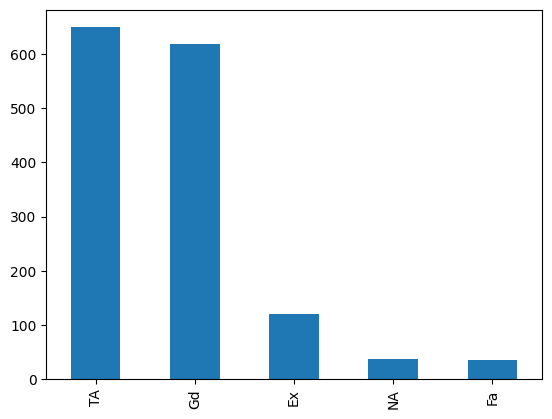

In [741]:
house_price_df.BsmtQual.value_counts().plot.bar()

<AxesSubplot: >

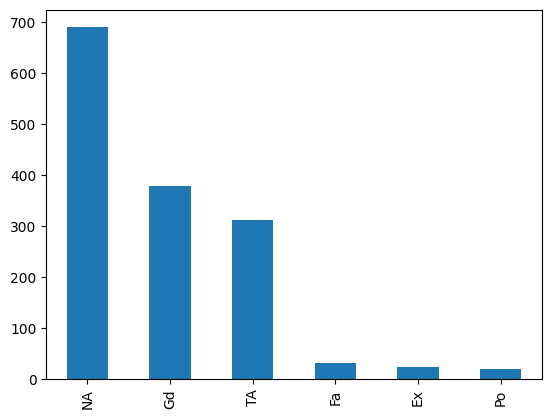

In [742]:
house_price_df.FireplaceQu.value_counts().plot.bar()

<AxesSubplot: >

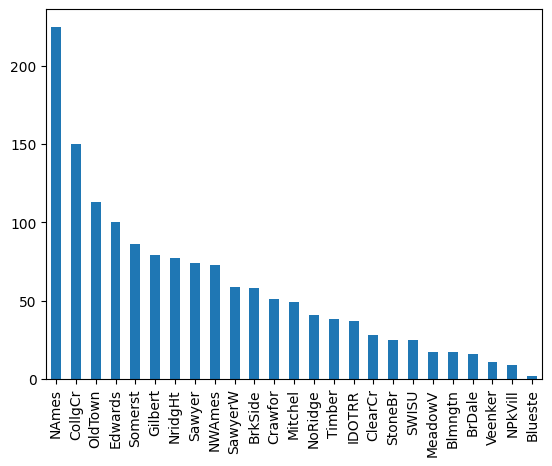

In [743]:
house_price_df.Neighborhood.value_counts().plot.bar()

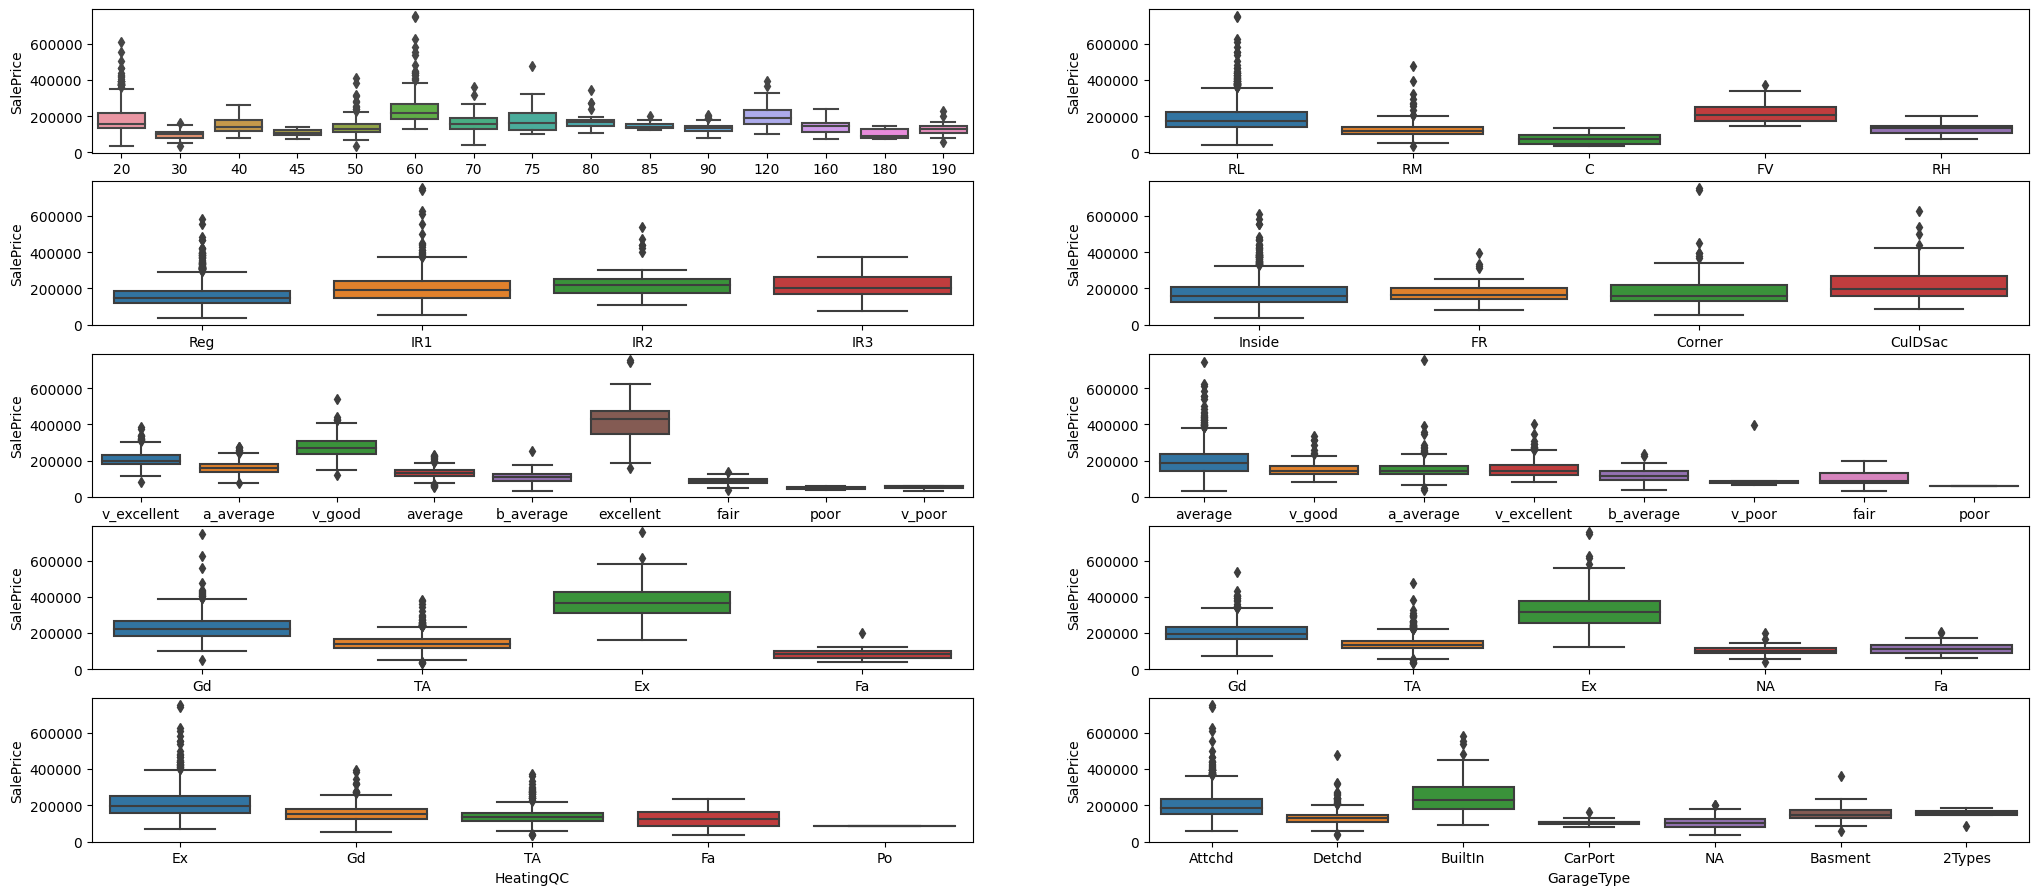

In [744]:
layout_col = 2
categorical_vars_list = ['MSSubClass','MSZoning','LotShape','LotConfig','OverallQual','OverallCond','ExterQual','BsmtQual','HeatingQC','GarageType']
row = len(categorical_vars_list)
plt.figure(figsize=(25,22))
for index in list(enumerate(categorical_vars_list)):
    plt.subplot(row, layout_col, index[0]+1)
    sns.boxplot(x=index[1], y='SalePrice',data=house_price_df)
plt.show()

### Quantitative variables

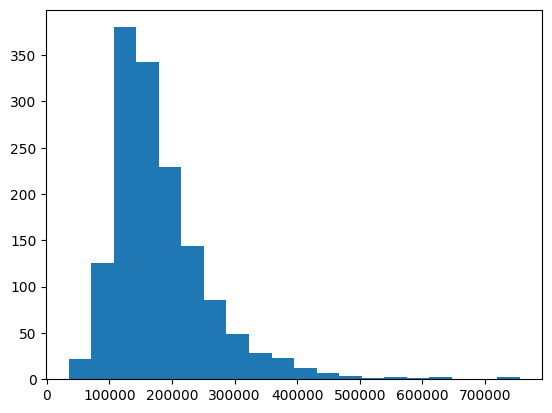

In [745]:
plt.hist(house_price_df.SalePrice,bins=20)
plt.show()

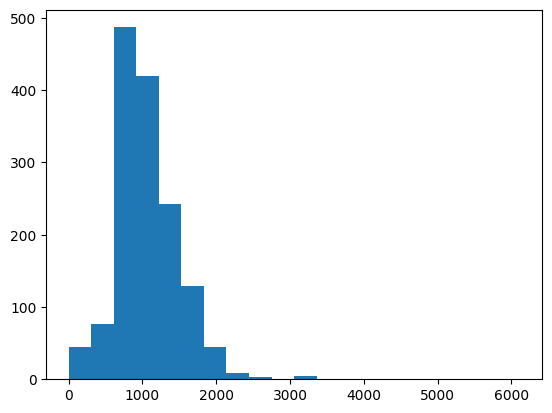

In [746]:
plt.hist(house_price_df.TotalBsmtSF,bins=20)
plt.show()

In [747]:
numerical_variables = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","SalePrice"]

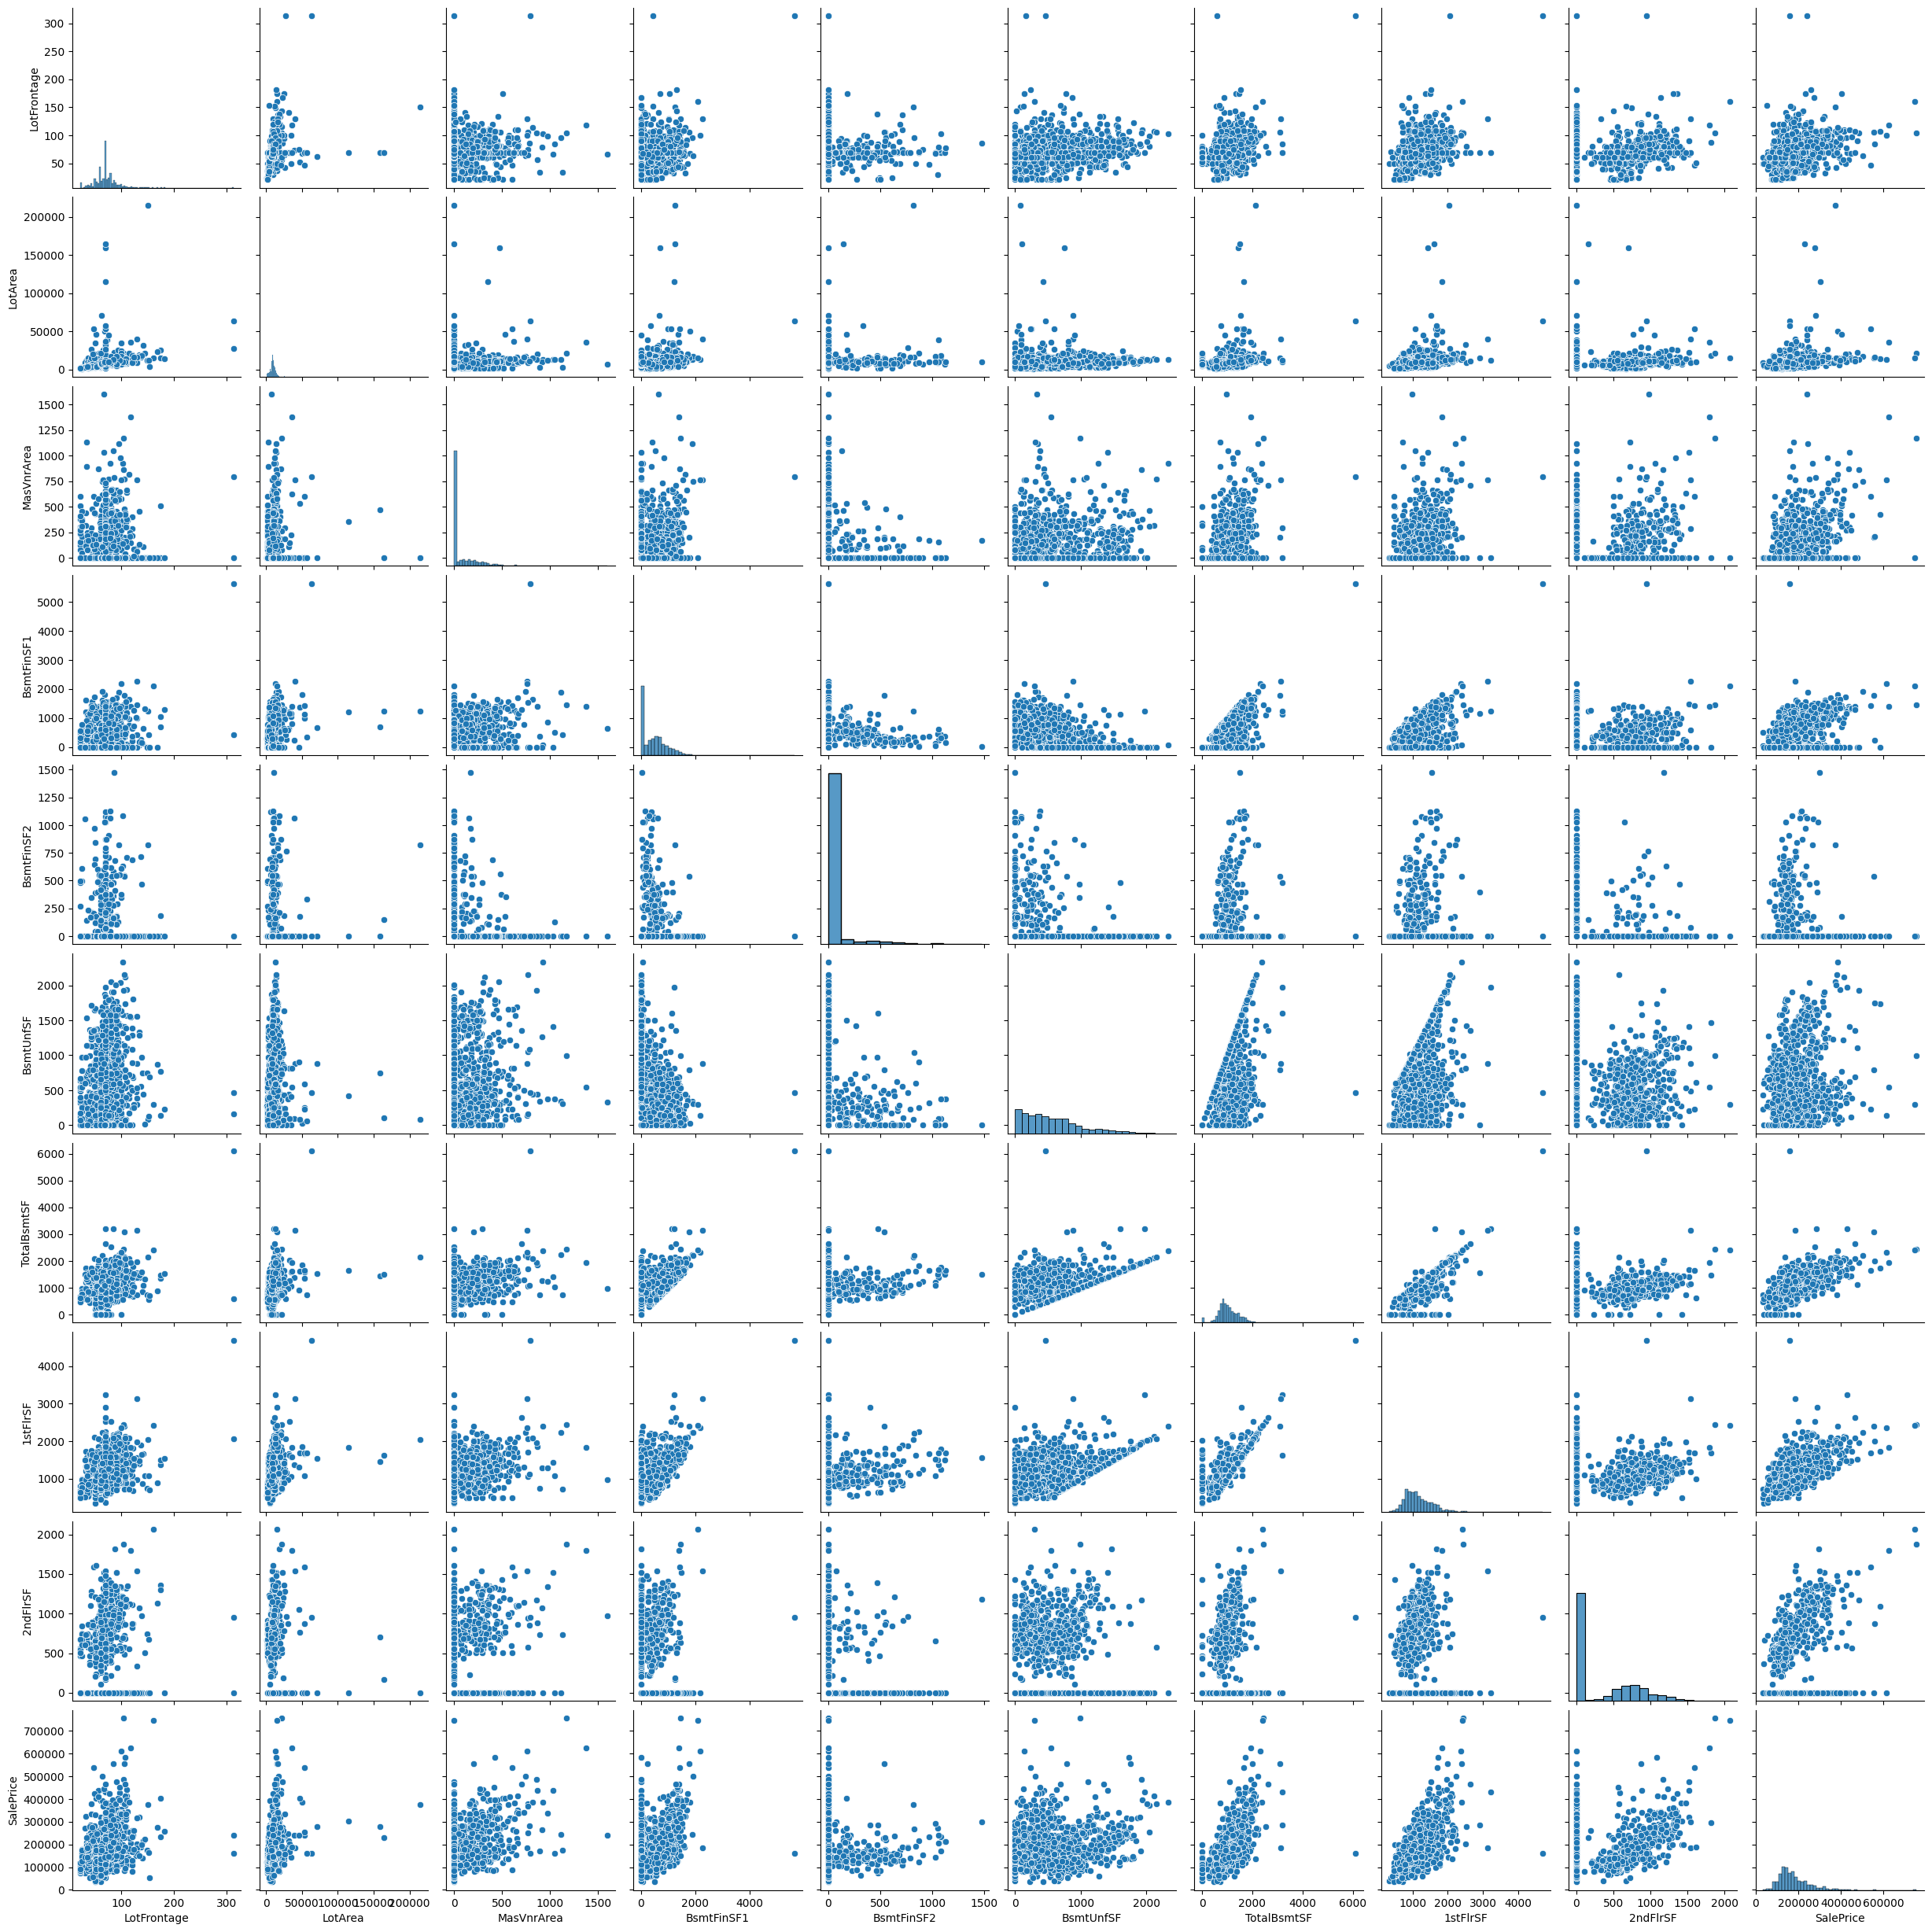

In [748]:
sns.pairplot(data=house_price_df, vars=numerical_variables)
plt.show()

#### Correlation Matrix

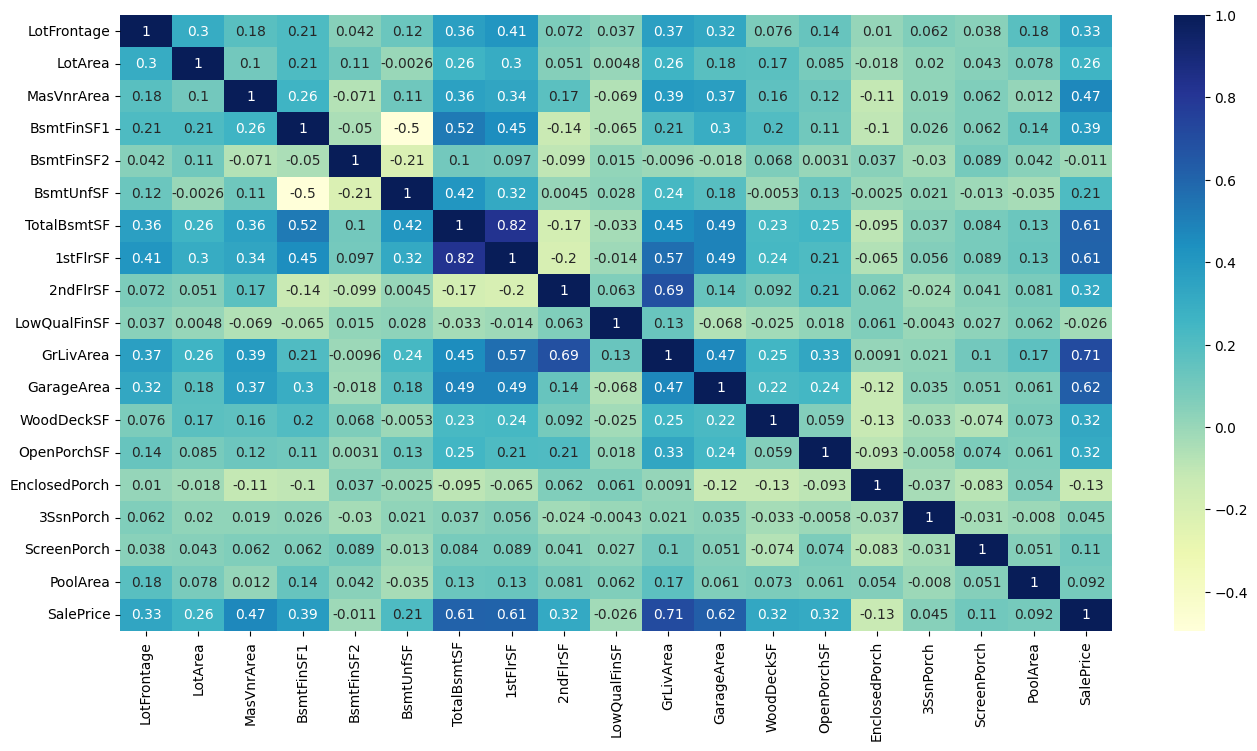

In [749]:
house_price_num_df = house_price_df[["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","SalePrice"]]
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(house_price_num_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

SalePrice has positive correlation with GrLivArea, TotalBsmtSF, 1stFlrSF and GarageArea<br>
SalePrice has negative correlation with BsmtFinSF2, LowQualFinSF and EnclosedPorch<br>
Independent variables that are highly correlated are 1stFlrSF:TotalBsmtSF, GrLivArea:2ndFlrSF

## Data preparation

### Splitting data

In [750]:
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1417 non-null   object 
 9   OverallCond    1438 non-null   object 
 10  RoofStyle      1460 non-null   object 
 11  Exterior1st    1460 non-null   object 
 12  MasVnrType     1460 non-null   object 
 13  MasVnrArea     1460 non-null   float64
 14  ExterQual      1460 non-null   object 
 15  Foundation     1460 non-null   object 
 16  BsmtQual       1460 non-null   object 
 17  BsmtExposure   1460 non-null   object 
 18  BsmtFinT

In [751]:
categorical_vars_list = house_price_df.select_dtypes(include=['object'])
categorical_vars_list.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,...,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
0,60,RL,Reg,Inside,CollgCr,2Story,v_excellent,average,Gable,VinylSd,...,Gd,PConc,Gd,No,GLQ,Ex,Gd,NA,Attchd,RFn
1,20,RL,Reg,FR,Veenker,1Story,a_average,v_good,Gable,MetalSd,...,TA,CBlock,Gd,Gd,ALQ,Ex,TA,TA,Attchd,RFn
2,60,RL,IR1,Inside,CollgCr,2Story,v_excellent,average,Gable,VinylSd,...,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,TA,Attchd,RFn
3,70,RL,IR1,Corner,Crawfor,2Story,v_excellent,average,Gable,Wd Sdng,...,TA,BrkTil,TA,No,ALQ,Gd,Gd,Gd,Detchd,Unf
4,60,RL,IR1,FR,NoRidge,2Story,v_good,average,Gable,VinylSd,...,Gd,PConc,Gd,Av,GLQ,Ex,Gd,TA,Attchd,RFn


In [752]:
house_price_dummy_x_df = pd.get_dummies(house_price_df, columns = list(categorical_vars_list.columns), drop_first=True)
house_price_dummy_x_df.drop(['SalePrice'], axis=1, inplace=True)
house_price_dummy_x_df.head()

/var/folders/lx/dw27zfb556q4s5yfn2blyplm0000gn/T/ipykernel_10216/2741554256.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  house_price_dummy_x_df = pd.get_dummies(house_price_df, columns = list(categorical_vars_list.columns), drop_first=True)


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,1,0,0,0,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,1,1,0,0,0,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,1,1,0,0,0,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,0,0,0,0,1,0,0,0,1
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,1,1,0,0,0,0,0,0,1,0


In [753]:
house_price_dummy_y_df = house_price_df['SalePrice']

In [754]:
cols = house_price_dummy_x_df.columns
house_price_dummy_x_df = pd.DataFrame(scale(house_price_dummy_x_df))
house_price_dummy_x_df.columns = cols
house_price_dummy_x_df.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'FireplaceQu_TA', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=160)

In [755]:
#Splitting data as train set and test set
X_train, X_test, y_train, y_test = train_test_split(house_price_dummy_x_df, house_price_dummy_y_df, train_size=0.7,test_size = 0.3, random_state=100)

### Model building and evaluation

In [756]:
# Instantiate and Fit a line
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [757]:
print(lm.intercept_)
print(lm.coef_)

2517806548237.9023
[-4.26912277e+03  4.28721159e+03  1.41502011e+03  2.93987230e+16
  1.03981593e+16  2.84814265e+16 -2.82776372e+16 -8.86954979e+15
 -1.00153479e+16 -1.11556782e+15  1.20561879e+16  4.57367733e+03
  1.81647817e+03  4.81437857e+03  1.19681056e+03 -1.42939274e+03
 -5.65466225e+03  2.73796703e+03  2.46473426e+03  1.13353974e+04
 -1.95321685e+03  1.85382289e+03 -6.74128150e+02  6.66218268e+02
  1.72801734e+03  1.84039646e+03 -8.75424302e+01  1.44626301e+02
 -2.75130659e+03 -3.21508833e+02 -1.77791748e+03  1.67496411e+03
  1.73525772e+03  2.11000000e+02  9.51250000e+02  1.44850000e+03
 -5.73000000e+02  7.20000000e+01 -6.21050000e+03 -3.43200000e+03
 -2.16700000e+03 -5.90000000e+01  6.59000000e+03  3.96400000e+03
  1.44690000e+04  1.24895000e+04 -4.30000000e+01 -1.54400000e+03
  7.41500000e+02  1.74900000e+03 -2.91650000e+03 -8.65000000e+01
 -4.65000000e+02  1.36800000e+03  4.72500000e+02  1.57900000e+03
  3.92100000e+03  5.61500000e+03 -4.39600000e+03  3.08700000e+03
 -5.33

In [758]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8861296170945763
-4.794017121449951e+18
726572615500.6315
1.351295613094495e+31
711628418.7077683
3.085149801585605e+28


### Ridge Regression

In [759]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [761]:
model_cv.best_params_

{'alpha': 500}

In [762]:
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 8.13442381e+01  2.67827853e+03  3.35445509e+03  2.04580840e+03
  2.88311643e+02  1.54606578e+03  3.79014071e+03  5.15733677e+03
  4.28483867e+03 -1.01860247e+03  7.25943272e+03  2.59519192e+03
  6.24853683e+02  4.31132589e+03  2.47677400e+03  5.59822018e+01
 -2.89380978e+03  4.19112178e+03  3.16132457e+03  5.25676306e+03
  3.89633509e+03  2.27119464e+03  6.15856891e+02 -1.05951097e+02
  1.04131590e+03  1.27337891e+03 -1.05348560e+02 -6.60431363e+01
 -1.48316737e+03  1.21562480e+02 -4.50721869e+01 -2.52178734e+02
  9.59568187e+02  2.62636329e+02  4.93661478e+02 -6.56108466e+02
 -4.27851747e+02 -1.16977823e+03 -2.27436695e+03 -2.18258137e+03
 -5.48388140e+02 -1.46931941e+03  1.24443756e+03  3.64484366e+02
  1.32698086e+03 -1.29172793e+03  4.42486875e+02 -2.17430213e+03
 -6.31434501e+02  1.83334854e+03 -1.62534214e+03 -1.23051323e+02
 -3.71456935e+00 -5.41622692e+01 -2.30939521e+02  4.01771027e+02
 -5.61508669e+02  2.88455511e+03 -3.80636955e+03 -7.88259576e+02
 -1.15919003e+03 -1.14981

In [766]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8487422235553841
0.8399326754862211
965130312571.7313
451183773306.6394
945279444.242636
1030099939.0562544


### Lasso

In [767]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.976e+11, tolerance: 5.301e+08
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.229e+11, tolerance: 4.851e+08
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [768]:
model_cv.best_params_

{'alpha': 500}

In [769]:
alpha = 500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [770]:
lasso.coef_

array([-1.96044643e+03,  3.56282565e+03,  1.58588883e+03,  0.00000000e+00,
       -0.00000000e+00,  7.83434987e+02,  3.44639352e+02,  0.00000000e+00,
        2.00173644e+03, -2.19947997e+03,  2.30807737e+04,  3.29003173e+03,
        7.14489612e+02,  4.45811660e+03,  1.45773213e+03, -0.00000000e+00,
       -5.25898450e+03,  1.33320335e+03,  2.93450841e+03,  8.64534384e+03,
        0.00000000e+00,  1.59564059e+03, -6.33061521e+01, -0.00000000e+00,
        1.14206661e+03,  1.19991807e+03, -0.00000000e+00,  0.00000000e+00,
       -1.92465726e+03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -2.15684677e+02,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -4.30411058e+03, -3.58545178e+03,
       -7.74552727e+02, -7.99730734e+02,  0.00000000e+00,  1.19341253e+02,
        1.27317031e+03, -0.00000000e+00,  0.00000000e+00, -1.96921041e+03,
       -0.00000000e+00,  1.72245427e+03, -2.06231088e+03, -0.00000000e+00,
       -0.00000000e+00,  

In [771]:
np.sum(lasso.coef_ >= 0)

101

In [772]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8750146882236036
0.8528250812081636
797493628803.9192
414843787751.83997
781090723.6081481
947131935.5064839


In [773]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.861296e-01,8.487422e-01,8.750147e-01
1,R2 Score (Test),-4.794017e+18,8.399327e-01,8.528251e-01
2,RSS (Train),7.265726e+11,9.651303e+11,7.974936e+11
3,RSS (Test),1.351296e+31,4.511838e+11,4.148438e+11
4,MSE (Train),2.667636e+04,3.074540e+04,2.794800e+04
5,MSE (Test),1.756459e+14,3.209517e+04,3.077551e+04


### Changes in coefficients after regularization

In [774]:
betas = pd.DataFrame(index=house_price_dummy_x_df.columns)
betas.rows = house_price_dummy_x_df.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

/var/folders/lx/dw27zfb556q4s5yfn2blyplm0000gn/T/ipykernel_10216/3631546738.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = house_price_dummy_x_df.columns


,Linear,Ridge,Lasso
LotFrontage,-4.269123e+03,81.344238,-1960.446431
LotArea,4.287212e+03,2678.278533,3562.825645
MasVnrArea,1.415020e+03,3354.455088,1585.888829
BsmtFinSF1,2.939872e+16,2045.808400,0.000000
BsmtFinSF2,1.039816e+16,288.311643,-0.000000
BsmtUnfSF,2.848143e+16,1546.065783,783.434987
TotalBsmtSF,-2.827764e+16,3790.140710,344.639352
1stFlrSF,-8.869550e+15,5157.336765,0.000000
2ndFlrSF,-1.001535e+16,4284.838672,2001.736442
LowQualFinSF,-1.115568e+15,-1018.602467,-2199.479968
